In [25]:
import sys
import numpy as np
ln = np.log
import analyze_helper as anh
import importlib
importlib.reload(anh)
from glob import glob
import matplotlib.pyplot as plt
from collections import defaultdict
import json
import pandas as pd
from functools import partial
import numpy.ma as npma

successfully loaded /home/julian/puhtidata/analysis/analyze_helper.py


In [42]:
imported_patterns = []
all_singles = []
fitres_cache_file = "squared_weight_transient.json"

In [43]:
def import_set(pattern,f=False):
    global all_singles, imported_patterns
    if not f and pattern in imported_patterns:
        print(pattern, " already imported")
        return
    new = list((map(lambda s : anh.SingleSimul(s,fitres_cache_file), sorted(anh.filter_successful(glob("data/"+pattern)+glob("data/analysis/"+pattern))))))
    print(len(new))
    if len(new) == 0:
        raise ValueError("no simuls in set ", pattern)
    all_singles.extend(new)
    print("imported ", len(new), " dirs for ", pattern)
    imported_patterns.append(pattern)

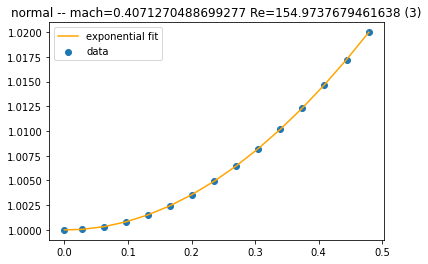

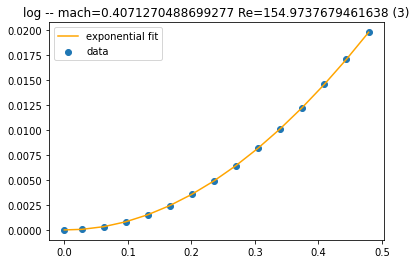

TransientFitres(a=1.314734658472301, b=0.7140456852859332, a_t=0.5040145227887824, rsq=nan, a_err=nan, total_err=1.239644938714236e-09, simul_name='data/high_re_proper_dsxy-111')
=====
1
imported  1  dirs for  high_re_proper_dsxy-111


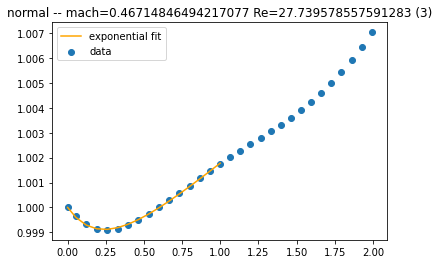

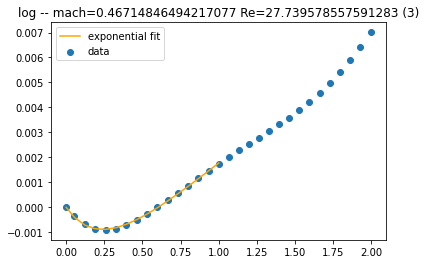

TransientFitres(a=1.0049869252982349, b=0.9967658400157755, a_t=0.013858510608311567, rsq=nan, a_err=nan, total_err=1.2044328367546436e-06, simul_name='data/X_var_hel-force_99-12-1098')
=====
1
imported  1  dirs for  X_var_hel-force_99-12-1098


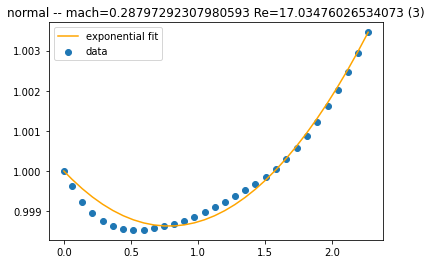

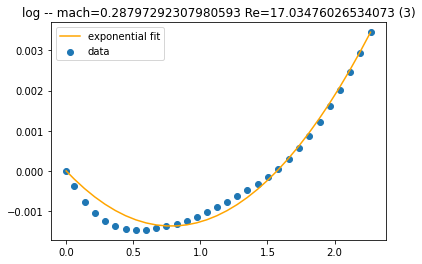

TransientFitres(a=1.0540618671273227, b=0.590273591716808, a_t=0.9190259097952088, rsq=nan, a_err=nan, total_err=0.00011375178302498425, simul_name='data/X_var_hel-force_99-12-93')
=====
1
imported  1  dirs for  X_var_hel-force_99-12-93


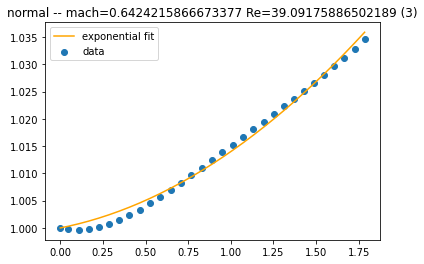

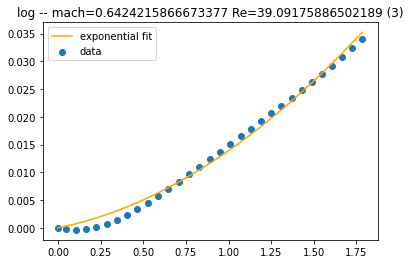

TransientFitres(a=1.1236380195866371, b=0.5613816873674013, a_t=0.8736650753688995, rsq=nan, a_err=nan, total_err=0.002834279781794649, simul_name='data/X_var_hel-force_99-14-280')
=====
1
imported  1  dirs for  X_var_hel-force_99-14-280


In [44]:
import_set("high_re_proper_dsxy-111", True)
import_set("X_var_hel-force_99-12-1098", True)
import_set("X_var_hel-force_99-12-93", True)
import_set("X_var_hel-force_99-14-280", True)

In [68]:
# für mehr accuracy muss Zeit noch mit rein
def diff1(x,t):
    
    tsteps = t[1:] - t[:-1]
    res = (x[1:] - x[:-1])/tsteps
    
    return res

def diff2(x,t):
    
    #return diff1(diff1(x,t), t[:-1])
    
    stc = [-1,2,-1]
    
    res = np.convolve(x,stc, "valid")
    
    return res

In [69]:
print(all_singles)

[<analyze_helper.SingleSimul object at 0x7f8ac9dd2590>, <analyze_helper.SingleSimul object at 0x7f8ac9d50d10>, <analyze_helper.SingleSimul object at 0x7f8ac9a33390>, <analyze_helper.SingleSimul object at 0x7f8ac9b39450>]


data/high_re_proper_dsxy-111


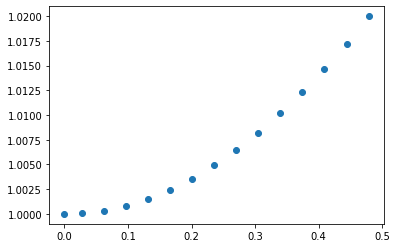

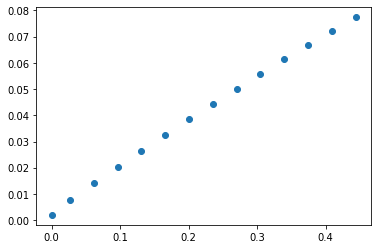

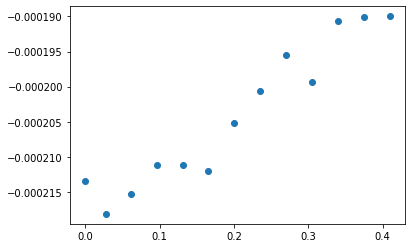

In [71]:
i = 0
t = all_singles[i].real_time - all_singles[i].real_time[0]
var = all_singles[i].relvar

print(all_singles[i].dirname)
plt.scatter(t, var)
plt.show()
plt.scatter((t[:-1]),(diff1((ln(var)), t)))
plt.show()
plt.scatter((t[:-2]),(diff2((ln(var)), t)))
plt.show()

[0.         0.04758521 0.10713609 0.16660582 0.22613275 0.28574179
 0.34550471 0.40527279 0.46541158 0.52566461 0.58618888 0.64706101
 0.70770213 0.76826426 0.82887408 0.88962114 0.9503066  1.01099539
 1.07169489 1.13207751 1.19184171 1.25120963 1.31054548 1.36989734
 1.42944288 1.48867058 1.54773036 1.60663864 1.66584658 1.72501577
 1.78425134]


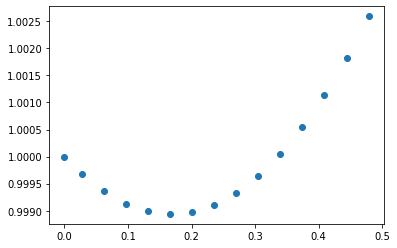

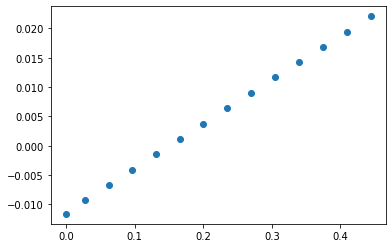

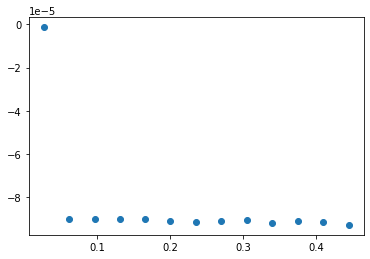

In [81]:
a  = 1.3
at = 0.75
b = 0.5
var = b*a**t + (1-b)*at**t
plt.scatter(t, var)
plt.show()
plt.scatter((t[:-1]),(diff1((ln(var)), t)))
plt.show()
plt.scatter((t[1:-1]),(diff2((ln(var)), t)))
plt.show()

In [99]:
def diff_ln(x,a,b,c):
    return (a**x * b *ln(a) + (1 - b)* c**x *ln(c))/(a**x*b + (1 - b)*c**x)

def normed(x):
    return x/x[0]

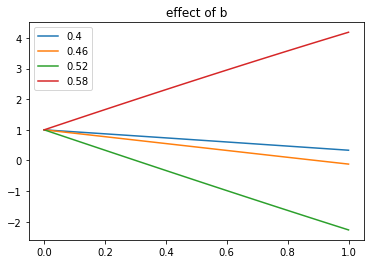

In [102]:
x = np.linspace(0,1,50)
a = 1.2
c = 0.8
b = 0.5
for b in np.arange(0.4,0.6,0.06):
    plt.plot(x,normed(diff_ln(x,a,b,c)),label=str(round(b,2)))
plt.title("effect of b")
plt.legend()
plt.show()


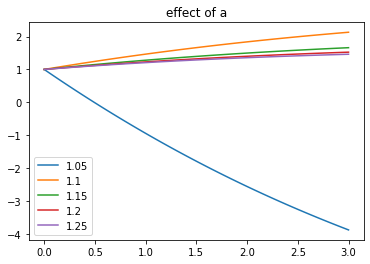

In [103]:
x = np.linspace(0,3,50)
a = 1.2
c = 0.8
b = 0.8
for a in np.arange(1.05,1.3,0.05):
    plt.plot(x,normed(diff_ln(x,a,b,c)),label=str(round(a,2)))
plt.title("effect of a")
plt.legend()
plt.show()


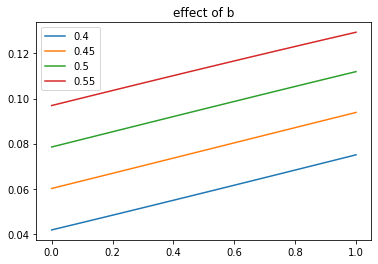

In [94]:
x = np.linspace(0,1,50)
a = 1.2
c = 0.8
b = 0.5
for b in np.arange(0.4,0.6,0.05):
    plt.plot(x,diff_ln(x,a,b,c),label=str(round(b,2)))
plt.title("effect of b")
plt.legend()
plt.show()
